In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Step 2: Load Dataset
df = pd.read_csv('/kaggle/RTA Dataset.csv')  # Update path if using local file
df.head()





,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
# Overview
df.info()
df.describe()
df.isnull().sum()

# Drop or fill missing values
df = df.dropna()  # Or use imputation for specific columns

# Drop duplicates
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

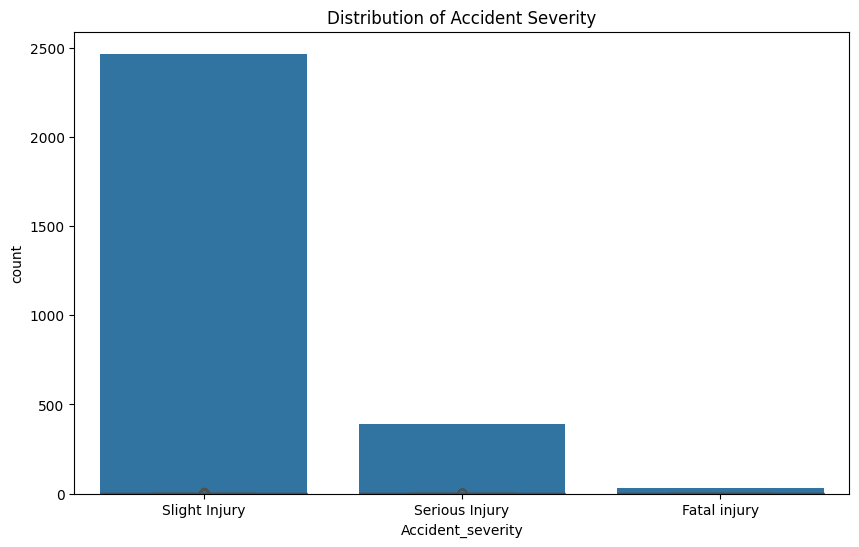

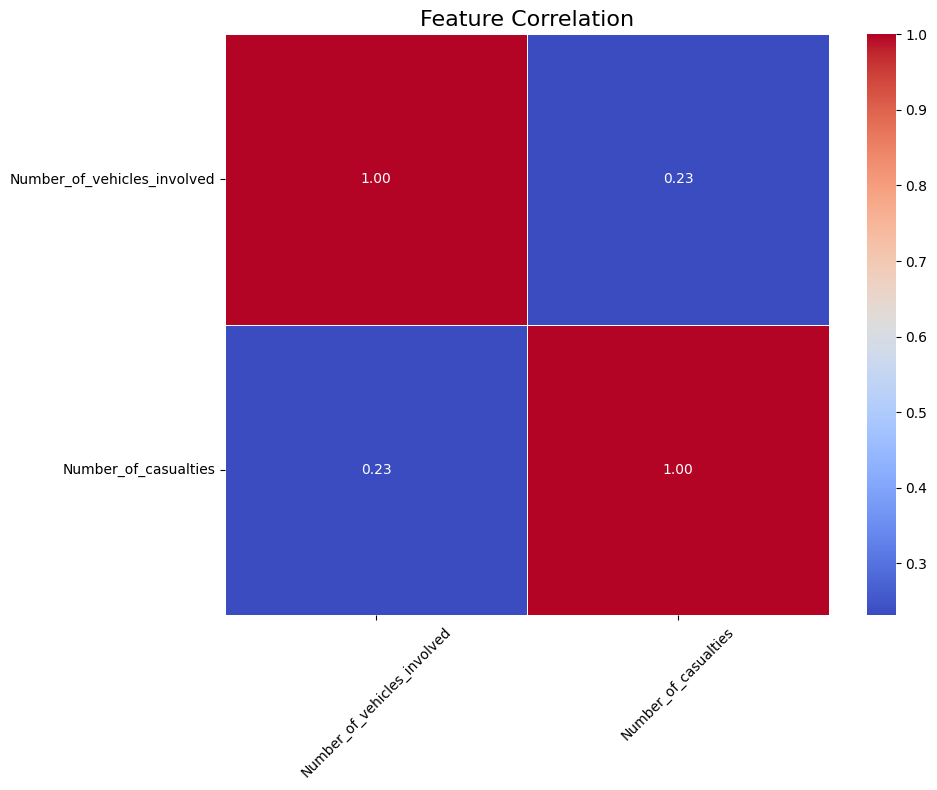

In [ ]:
# Univariate Plots
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident_severity', data=df)
plt.title('Distribution of Accident Severity')

# Bivariate Analysis
sns.boxplot(x='Accident_severity', y='Number_of_vehicles_involved', data=df)

# Correlation Heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Feature Correlation')

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)  # Ensures non-numeric columns are excluded
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Example: Create hour_of_day or is_weekend if applicable
# df['Hour'] = pd.to_datetime(df['Time']).dt.hour
# df['is_weekend'] = pd.to_datetime(df['Date']).dt.dayofweek > 4

# Feature and label split
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Display results
print("\nShape of features (X):", X.shape)
print("Shape of label (y):", y.shape)
print("\nFirst 5 rows of scaled features:")
print(X_scaled[:5])



Shape of features (X): (2889, 31)
Shape of label (y): (2889,)

First 5 rows of scaled features:
[[-0.21715034 -1.44671895 -0.96798796  0.1526612   0.59414537 -0.43453937
   0.8130826  -0.12816406  0.34377062 -1.55929318  0.10327449 -1.01026551
   1.67019401  0.05652717  1.19893377  2.71347068 -0.5835009   0.63887385
  -0.38709432 -1.27646417 -0.01743785 -0.53306555 -0.43318312  0.40492359
  -0.19084172  0.65018479 -0.52235501 -0.6892254   0.03929733 -5.25937027
  -1.18257524]
 [-0.21715034 -1.44671895 -0.96798796  0.1526612   0.59414537 -0.43453937
  -1.54140683 -1.24814583  0.34377062 -1.01765581  0.10327449  0.82392589
   0.53271393  0.05652717  1.19893377 -0.25031639 -0.5835009   0.63887385
  -0.38709432 -1.27646417 -0.01743785 -0.53306555  3.29696896 -0.34785907
  -0.19084172 -1.23290681 -0.52235501 -0.6892254   0.03929733  0.19326761
   0.38712835]
 [-0.12358991  0.52060091 -0.96798796  0.1526612   0.59414537 -0.43453937
  -1.54140683  1.21581406  0.34377062 -1.01765581  0.103274

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.05      0.10        79
           2       0.86      1.00      0.92       493

    accuracy                           0.86       578
   macro avg       0.62      0.35      0.34       578
weighted avg       0.87      0.86      0.80       578

Accuracy: 0.8598615916955017

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        79
           2       0.85      1.00      0.92       493

    accuracy                           0.85       578
   macro avg       0.28      0.33      0.31       578
weighted avg       0.73      0.85      0.79       578

Accuracy: 0.8529411764705882


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

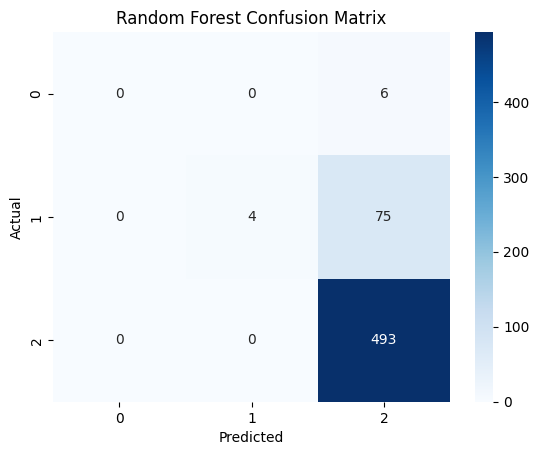

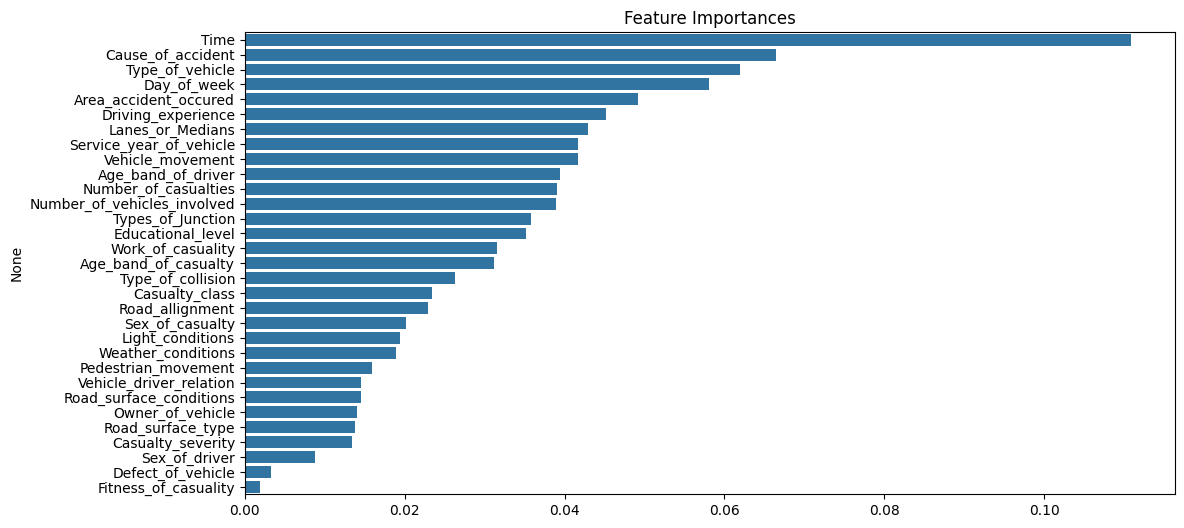

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=features[indices])
plt.show()
